In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [151]:
df.drop("Adj Close", axis=1, inplace=True)
df['Date']= pd.to_datetime(df['Date'])

In [152]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


In [153]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [154]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [155]:
df.shape

(1876, 6)

In [156]:
df.reset_index(inplace=True)

In [157]:
df.head()

,index,Date,Open,High,Low,Close,Volume
0,0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008
1,1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992
2,2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000
3,3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984
4,4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008


In [158]:
tvdf = pd.read_csv("tweetvolume.csv")
tvdf.rename({'value': 'Tweet'}, axis=1, inplace=True)
tvdf['date']= pd.to_datetime(tvdf['date'])
tvdf.head()

,date,Tweet
0,2016-12-01,20335
1,2016-12-02,16186
2,2016-12-03,16345
3,2016-12-04,18558
4,2016-12-05,20236


In [159]:
gtdf = pd.read_csv("multiTimeline.csv")
gtdf['Mois']= pd.to_datetime(gtdf['Mois'])
gtdf.head()

,Mois,Attention
0,2016-12-01,7
1,2017-01-01,7
2,2017-02-01,6
3,2017-03-01,7
4,2017-04-01,6


In [160]:
#df = pd.merge(df, tvdf, left_on="Date", right_on="date").drop("date",axis=1)
#df.shape

In [161]:
dfs = pd.merge(tvdf.assign(grouper=tvdf['date'].dt.to_period('M')),gtdf.assign(grouper=gtdf['Mois'].dt.to_period('M')),how='inner', on='grouper').drop(["Mois","grouper"],axis=1)

In [162]:
dfs.shape

(1907, 3)

In [163]:
gdf = pd.read_csv("gold.csv")
gdf['Date']= pd.to_datetime(gdf['Date'])
gdf.drop(["Open","High","Low", "Volume", "Currency"],axis=1,inplace=True)
gdf.rename({'Close': 'Gold'}, axis=1, inplace=True)
gdf.head()

,Date,Gold
0,2016-12-01,1169.4
1,2016-12-02,1177.8
2,2016-12-05,1176.5
3,2016-12-06,1170.1
4,2016-12-07,1177.5


In [164]:
dfs = pd.merge(dfs, gdf, left_on="date",right_on="Date", how="left").drop("Date",axis=1)
dfs = dfs.fillna(method="backfill")
dfs = dfs.fillna(method="ffill")
dfs.head()

,date,Tweet,Attention,Gold
0,2016-12-01,20335,7,1169.4
1,2016-12-02,16186,7,1177.8
2,2016-12-03,16345,7,1176.5
3,2016-12-04,18558,7,1176.5
4,2016-12-05,20236,7,1176.5


In [165]:
predictdf = dfs.iloc[-31:]
predictdf.head()

,date,Tweet,Attention,Gold
1876,2022-01-20,213699,41,1842.6
1877,2022-01-21,228883,41,1831.8
1878,2022-01-22,165450,41,1841.7
1879,2022-01-23,188870,41,1841.7
1880,2022-01-24,179311,41,1841.7


In [166]:
newdf = pd.merge(df, dfs.iloc[:1876], left_index=True, right_index=True)
newdf.head()

,index,Date,Open,High,Low,Close,Volume,date,Tweet,Attention,Gold
0,0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008,2016-12-01,20335,7,1169.4
1,1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,2016-12-02,16186,7,1177.8
2,2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,2016-12-03,16345,7,1176.5
3,3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,2016-12-04,18558,7,1176.5
4,4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,2016-12-05,20236,7,1176.5


In [187]:
from sklearn.model_selection import train_test_split
required_features = ['Tweet', 'Attention', 'Gold', 'index']
output_label = 'Close'
x=pd.DataFrame(newdf[required_features])
y=newdf[output_label]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle=False)

In [168]:
X_train.tail()

,Tweet,Attention,Gold,index
1683,98470,31,1805.9,1683
1684,141201,31,1805.9,1684
1685,98812,31,1809.9,1685
1686,92346,31,1825.0,1686
1687,86926,31,1829.0,1687


In [185]:

X_test  = X_test.values.reshape(-1, 1, X_train.shape[1])
y_pred = model.predict(X_test)

6/6 [==============================] - 1s 3ms/step


In [181]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LSTM, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_train = X_train.values.reshape(-1, 1, X_train.shape[1])
X_test  = X_test.values.reshape(-1, 1, X_test.shape[1])
y_train = y_train.values.reshape(-1, 1, y_train.shape[1])
y_test = y_test.values.reshape(-1, 1, y_train.shape[1])

model = Sequential()

# LSTM
model.add(LSTM(30, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(30, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(30, input_shape=(1, X_train.shape[2])))
#model.add(Dropout(0.2))
model.add(Dense(50))

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

model.summary()

history = model.fit(X_train, y_train, epochs=130, batch_size=5, validation_split=0.2)

y_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {mse}')


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 1, 30)             4200      
                                                                 
 lstm_18 (LSTM)              (None, 1, 30)             7320      
                                                                 
 lstm_19 (LSTM)              (None, 30)                7320      
                                                                 
 dense_4 (Dense)             (None, 50)                1550      
                                                                 
Total params: 20,390
Trainable params: 20,390
Non-trainable params: 0
_________________________________________________________________
Epoch 1/130
338/338 [==============================] - 7s 4ms/step - loss: 339501216.0000
Epoch 2/130
338/338 [==============================] - 1s 4ms/step - loss: 337664800.0000
E

ValueError: in user code:

    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_10' (type Sequential).
    
    Input 0 of layer "lstm_17" is incompatible with the layer: expected shape=(None, None, 4), found shape=(None, 1, 1)
    
    Call arguments received by layer 'sequential_10' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1, 1), dtype=float32)
      • training=False
      • mask=None


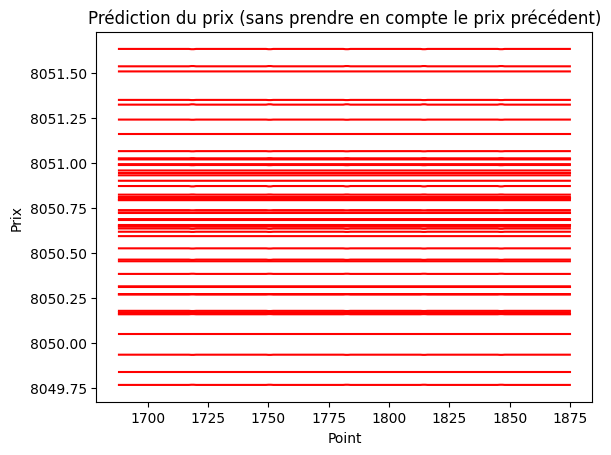

In [188]:
plt.plot(X_train["index"], y_train,color='blue')
plt.plot(X_test["index"], y_test,color='blue')
plt.plot(X_test["index"], y_pred,color='red')
plt.title('Prédiction du prix (sans prendre en compte le prix précédent)')
plt.xlabel('Point')
plt.ylabel('Prix')
plt.show()

In [25]:
regressor.score(X_test, y_test)

-2.5676936222283646

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.23138949506848552

In [27]:
newdf["PrevClose"] = newdf.Close.shift(1)
newdf = newdf.fillna(method="backfill")

In [28]:
newdf.head()

,index,Date,Open,High,Low,Close,Volume,date,Tweet,Attention,Gold,PrevClose
0,0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,147775008,2016-12-01,20335,7,1169.4,998.325012
1,1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,2016-12-02,16186,7,1177.8,998.325012
2,2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,2016-12-03,16345,7,1176.5,1021.750000
3,3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,2016-12-04,18558,7,1176.5,1043.839966
4,4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,2016-12-05,20236,7,1176.5,1154.729980


In [29]:
required_features = ['Tweet', 'Attention', 'Gold', 'PrevClose']
output_label = 'Close'
x=pd.DataFrame(newdf[required_features])
y=newdf[output_label]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 31, shuffle=False)
X_test.head()

,Tweet,Attention,Gold,PrevClose
1845,137590,35,1794.6,41744.328125
1846,120983,35,1788.7,40680.417969
1847,133215,35,1802.2,36457.316406
1848,122898,35,1811.7,35030.250000
1849,110526,35,1808.8,36276.804688


In [30]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
X_test.PrevClose[X_test.PrevClose != 41744.328125] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_7876\3571636084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.PrevClose[X_test.PrevClose != 41744.328125] = 0


In [32]:
X_test.head()

,Tweet,Attention,Gold,PrevClose
1845,137590,35,1794.6,41744.328125
1846,120983,35,1788.7,0.000000
1847,133215,35,1802.2,0.000000
1848,122898,35,1811.7,0.000000
1849,110526,35,1808.8,0.000000


In [33]:
X_test.loc[X_test.PrevClose != 0]

,Tweet,Attention,Gold,PrevClose
1845,137590,35,1794.6,41744.328125


In [34]:
pred_arr = np.zeros(shape=(31))
for i in range(len(X_test)):
    if i!=0:
        X_test.at[1845+i, 'PrevClose']= cur_pred
    cur_pred = regressor.predict(X_test.iloc[[i]])[0]
    pred_arr[i]=cur_pred

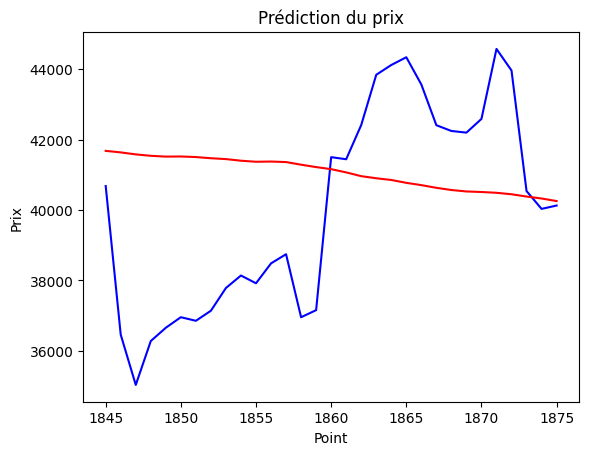

In [35]:
plt.plot(X_test.index, y_test,color='blue')
plt.plot(X_test.index, pred_arr,color='red')
plt.title('Prédiction du prix')
plt.xlabel('Point')
plt.ylabel('Prix')
plt.show()

In [36]:
mean_absolute_percentage_error(y_test, pred_arr)

0.0753280259904287

In [37]:
y_train.tail()

1840    43177.398438
1841    43113.878906
1842    42250.550781
1843    42375.632813
1844    41744.328125
Name: Close, dtype: float64

In [38]:
y_test.head()

1845    40680.417969
1846    36457.316406
1847    35030.250000
1848    36276.804688
1849    36654.328125
Name: Close, dtype: float64

In [39]:
required_features = ['Tweet', 'Attention', 'Gold']
output_label = 'Close'
x=pd.DataFrame(newdf[required_features])
y=newdf[output_label]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 31, shuffle=False)
X_test.head()

,Tweet,Attention,Gold
1845,137590,35,1794.6
1846,120983,35,1788.7
1847,133215,35,1802.2
1848,122898,35,1811.7
1849,110526,35,1808.8


In [40]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

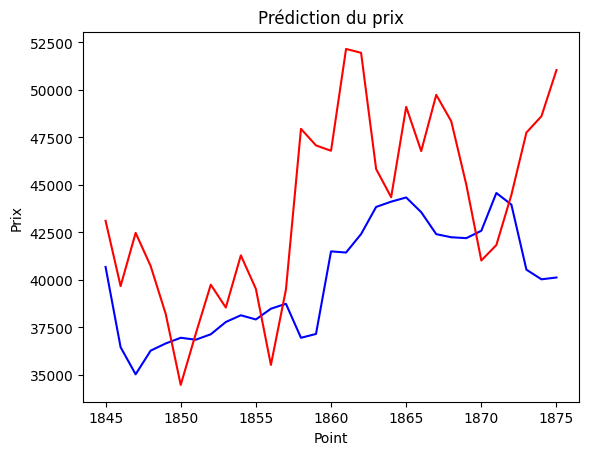

In [42]:
plt.plot(X_test.index, y_test,color='blue')
plt.plot(X_test.index, y_pred,color='red')
plt.title('Prédiction du prix')
plt.xlabel('Point')
plt.ylabel('Prix')
plt.show()

In [43]:
mean_absolute_percentage_error(y_test, y_pred)

0.11225069171451726